# Redes Multicapa de Aerolíneas

## Procesamiento de datos

Procesamiento de datos de rutas aéreas por distintas aerolíneas en R para obtener matrices de adyacencia asociados a diferentes multiplex.

In [1]:
getwd()

[1] "/Users/Yuriko/Documents/UNAM/Tesis_Lic/Code"

In [2]:
setwd("/Users/Yuriko/Documents/UNAM/Tesis_Lic/")

## Librerías

In [3]:
# Librerías necesarias
library(tidyverse)
library(data.table)
#library(igraph)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:purrr’:

    transpose



## Bases de datos

## Rutas Aéreas

### Base de datos Rutas Aéreas (Airline Route Mapper GitHub) que se utilizó para el análisis

Last updated: ***2017***

In [4]:
# Se carga la tabla de rutas de 2017

tabla_rutas2017 <- data.table::fread(
  input = "data/rutas17.txt"
)

head(tabla_rutas2017)

Airline,Airline_ID,From,From_ID,To,To_ID,Codeshare,Stops,Equipment
2B,410,AER,2965,KZN,2990,,0,CR2
2B,410,ASF,2966,KZN,2990,,0,CR2
2B,410,ASF,2966,MRV,2962,,0,CR2
2B,410,CEK,2968,KZN,2990,,0,CR2
2B,410,CEK,2968,OVB,4078,,0,CR2
2B,410,DME,4029,KZN,2990,,0,CR2


### Base de datos Aerolíneas (Airline Route Mapper)

##### La base de datos airlines.txt fue actualizada: # Date: 2019-03-29 ?
Airline_ID	Airline_Name
Líneas: 689

In [29]:
nueva_lista_aerolineas = read.csv(file = "data/aerolineas_matrices/nueva_lista_aerolineas.csv", header = TRUE, sep = ",") 

In [30]:
nueva_lista_aerolineas %>% head

Nodes,Airlines
3072,global
934,Star_Alliance
900,Sky_Team
698,oneworld
259,AA
242,TK


In [31]:
str(nueva_lista_aerolineas)

'data.frame':	525 obs. of  2 variables:
 $ Nodes   : int  3072 934 900 698 259 242 230 192 188 184 ...
 $ Airlines: Factor w/ 525 levels "2B","2G","2I",..: 524 417 416 525 83 428 143 303 134 447 ...


In [32]:
nueva_lista_aerolineas$Airlines <-  as.character(nueva_lista_aerolineas$Airlines)

In [33]:
str(nueva_lista_aerolineas)

'data.frame':	525 obs. of  2 variables:
 $ Nodes   : int  3072 934 900 698 259 242 230 192 188 184 ...
 $ Airlines: chr  "global" "Star_Alliance" "Sky_Team" "oneworld" ...


In [8]:
# Se carga la tabla de airlines
#tabla_aerolineas <- data.table::fread(
#  input = "data/airlines.txt"
#  )

#head(tabla_aerolineas)

In [9]:
#str(tabla_aerolineas) #689 aerolineas activas 


In [10]:
#tabla_aerolineas %>% dplyr::filter(Airline_ID == "MU")

## Aeropuertos

### Base de datos Aeropuertos (OpenFlights Airports Database)

As of ***January 2017***, the OpenFlights Airports Database contains over 10,000 airports, train stations and ferry terminals spanning the globe, as shown in the map above. Each entry contains the following information:

**Airport ID**	Unique OpenFlights identifier for this airport.  
**Name**	Name of airport. May or may not contain the City name.  
**City**	Main city served by airport. May be spelled differently from Name.  
**Country**	Country or territory where airport is located. See countries.dat to cross-reference to ISO 3166-1 codes.  
**IATA**	3-letter IATA code. Null if not assigned/unknown.  
**ICAO**	4-letter ICAO code. Null if not assigned.  
**Latitude**	Decimal degrees, usually to six significant digits. Negative is South, positive is North.  
**Longitude**	Decimal degrees, usually to six significant digits. Negative is West, positive is East.  
**Altitude**	In feet.  
**Timezone**	Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.  
**DST**	Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time  
**Tz database time zone**	Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".  
**Type**	Type of the airport. Value "airport" for air terminals, "station" for train stations, "port" for ferry terminals and "unknown" if not known. In airports.csv, only type=airport is included.  
**Source**	Source of this data. "OurAirports" for data sourced from OurAirports, "Legacy" for old data not matched to OurAirports (mostly DAFIF), "User" for unverified user contributions. In airports.csv, only source=OurAirports is included.  

The data is UTF-8 encoded.  

*Note:*   
Rules for daylight savings time change from year to year and from country to country. The current data is an approximation for 2009, built on a country level. Most airports in DST-less regions in countries that generally observe DST (eg. AL, HI in the USA, NT, QL in Australia, parts of Canada) are marked incorrectly.

*Sample entries*.  
507,"London Heathrow Airport","London","United Kingdom","LHR","EGLL",51.4706,-0.461941,83,0,"E","Europe/London","airport","OurAirports"  
26,"Kugaaruk Airport","Pelly Bay","Canada","YBB","CYBB",68.534401,-89.808098,56,-7,"A","America/Edmonton","airport","OurAirports"  
3127,"Pokhara Airport","Pokhara","Nepal","PKR","VNPK",28.200899124145508,83.98210144042969,2712,5.75,"N","Asia/Katmandu","airport","OurAirports"  
8810,"Hamburg Hbf","Hamburg","Germany","ZMB",\N,53.552776,10.006683,30,1,"E","Europe/Berlin","station","User"

##### La base de datos aeropuertos.txt fue actualizada: # Date:  
Líneas: 7543

In [11]:
# Se carga la tabla de aeropuertos
tabla_aeropuertos <- data.table::fread(
  input = "data/aeropuertos.txt"
  )

head(tabla_aeropuertos)

Airport_ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz_database_time_zone,Type,Source
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.392,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789,20,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.726,239,10,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220,146,10,U,Pacific/Port_Moresby,airport,OurAirports
6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669,19,10,U,Pacific/Port_Moresby,airport,OurAirports


In [12]:
str(tabla_aeropuertos)


Classes ‘data.table’ and 'data.frame':	7543 obs. of  14 variables:
 $ Airport_ID           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Name                 : chr  "Goroka Airport" "Madang Airport" "Mount Hagen Kagamuga Airport" "Nadzab Airport" ...
 $ City                 : chr  "Goroka" "Madang" "Mount Hagen" "Nadzab" ...
 $ Country              : chr  "Papua New Guinea" "Papua New Guinea" "Papua New Guinea" "Papua New Guinea" ...
 $ IATA                 : chr  "GKA" "MAG" "HGU" "LAE" ...
 $ ICAO                 : chr  "AYGA" "AYMD" "AYMH" "AYNZ" ...
 $ Latitude             : num  -6.08 -5.21 -5.83 -6.57 -9.44 ...
 $ Longitude            : num  145 146 144 147 147 ...
 $ Altitude             : int  5282 20 5388 239 146 19 112 283 165 251 ...
 $ Timezone             : chr  "10" "10" "10" "10" ...
 $ DST                  : chr  "U" "U" "U" "U" ...
 $ Tz_database_time_zone: chr  "Pacific/Port_Moresby" "Pacific/Port_Moresby" "Pacific/Port_Moresby" "Pacific/Port_Moresby" ...
 $ Type                

##### La base de datos alliances.txt fue actualizada: # Date: 2019-03-29 líneas:15
Alliance_Name  List_of_Airlines

In [11]:
## Se carga la tabla de alianzas
#tabla_alianzas <- data.table::fread(
#  input = "data/alliances.txt"
#  )
#
#tabla_alianzas

## Procesamiento

In [13]:
## Renombramos las columnas de la tabla de aerolíneas
#names(tabla_aerolineas) <- c("Airline ID", 
#                             "Name", 
#                             "Alias", 
#                             "IATA", 
#                             "ICAO", 
#                             "Callsign", 
#                             "Country", 
#                             "Active"
#                              )

In [15]:
## Quitamos el primer renglón de la tabla_aerolíneas
#tabla_aerolineas <- tabla_aerolineas [-c(1), ]

In [18]:
##Quitamos columnas de ID que no necesitamos de tabla_rutas
#tabla_rutas <- tabla_rutas2017 %>%
#  dplyr::select(Airline,
#                Source_Airport,
#                Destination_Airport,
#                Codeshare,
#                Stops_Number,
#                Equipment)

In [19]:
##Checamos la tabla_rutas
#tabla_rutas %>% head

In [20]:
##Ahora hacemos un ciclo que recorra toda la tabla_aerolíneas, el cual 
##remueva los renglones correspondientes a las aerolíneas que NO están activas.
#
#tabla_aerolineas <- tabla_aerolineas %>% 
#  dplyr::filter(Active == "Y")

In [21]:
##Checamos la tabla_aerolineas
#tabla_aerolineas %>% head

In [22]:
#Falta remover los renglones de la tabla_aeropuertos que contienen algún aeropuerto inactivo

In [23]:
##Checamos la tabla_aeropuertos
#tabla_aeropuertos %>% head

In [24]:
##Encontramos la intersección entre tabla_aerolineas y tabla_rutas
##para usar sólo las rutas de las aerolíneas activas.
#tabla_rutas <- semi_join(tabla_rutas, tabla_aerolineas, by = c("Airline" = "IATA"))

In [25]:
#Encontramos la intersección entre tabla_aeropuertos y tabla_rutas
#para usar sólo las rutas de las aeropuertos activos.

In [26]:
##Checamos la tabla_rutas modificada
#tabla_rutas %>% head

In [27]:
##Checamos la tabla_rutas2
#tabla_rutas2 %>% head

In [28]:
##Quitamos el primer y segundo renglón de la tabla_aerolíneas
#tabla_rutas2 <- tabla_rutas2 [-c(2), ]

In [29]:
##Checamos tabla_rutas2
#tabla_rutas2 %>% head

In [30]:
## Renombramos las columnas de la tabla_rutas2
#names(tabla_rutas2) <- c("Airline", 
#                         "Source", 
#                         "Destination", 
#                         "Codeshare", 
#                         "Stops", 
#                         "Equipment"
#)

In [31]:
##Checamos tabla_rutas2
#tabla_rutas2 %>% head

In [32]:
##Encontramos la intersección entre tabla_aerolineas y tabla_rutas2
##para usar sólo las rutas de las aerolíneas activas.
#tabla_rutas2 <- semi_join(tabla_rutas2, tabla_aerolineas, by = c("Airline" = "IATA"))

In [33]:
#str(tabla_rutas) #2014

In [34]:
#str(tabla_rutas2) #2019

### Usamos la tabla_rutas17 para el análisis (de GitHub, actualizada en 2017)

In [13]:
str(tabla_rutas2017)


Classes ‘data.table’ and 'data.frame':	67663 obs. of  9 variables:
 $ Airline   : chr  "2B" "2B" "2B" "2B" ...
 $ Airline_ID: chr  "410" "410" "410" "410" ...
 $ From      : chr  "AER" "ASF" "ASF" "CEK" ...
 $ From_ID   : chr  "2965" "2966" "2966" "2968" ...
 $ To        : chr  "KZN" "KZN" "MRV" "KZN" ...
 $ To_ID     : chr  "2990" "2990" "2962" "2990" ...
 $ Codeshare : chr  "" "" "" "" ...
 $ Stops     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Equipment : chr  "CR2" "CR2" "CR2" "CR2" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [14]:
tabla_rutas2017$Codeshare %>% unique

[1] ""  "Y"

In [15]:
#Queremos converir la columna de Codeshare a booleano
tabla_rutas17 <- tabla_rutas2017 %>%
  dplyr::mutate(Codeshare = ifelse(test = Codeshare == "Y",
                                   yes = TRUE,
                                   no = FALSE
  )
  )

In [16]:
str(tabla_rutas17)

'data.frame':	67663 obs. of  9 variables:
 $ Airline   : chr  "2B" "2B" "2B" "2B" ...
 $ Airline_ID: chr  "410" "410" "410" "410" ...
 $ From      : chr  "AER" "ASF" "ASF" "CEK" ...
 $ From_ID   : chr  "2965" "2966" "2966" "2968" ...
 $ To        : chr  "KZN" "KZN" "MRV" "KZN" ...
 $ To_ID     : chr  "2990" "2990" "2962" "2990" ...
 $ Codeshare : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Stops     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Equipment : chr  "CR2" "CR2" "CR2" "CR2" ...


In [17]:
#Quitamos los renglones correspondientes a rutas aéreas que tienen escalas y codeshare.
tabla_rutas17f <- tabla_rutas17 %>% 
  dplyr::filter(Stops == 0,
                Codeshare == FALSE)
tabla_rutas17f %>% head 

Airline,Airline_ID,From,From_ID,To,To_ID,Codeshare,Stops,Equipment
2B,410,AER,2965,KZN,2990,FALSE,0,CR2
2B,410,ASF,2966,KZN,2990,FALSE,0,CR2
2B,410,ASF,2966,MRV,2962,FALSE,0,CR2
2B,410,CEK,2968,KZN,2990,FALSE,0,CR2
2B,410,CEK,2968,OVB,4078,FALSE,0,CR2
2B,410,DME,4029,KZN,2990,FALSE,0,CR2


In [19]:
str(tabla_rutas17f)


'data.frame':	53055 obs. of  9 variables:
 $ Airline   : chr  "2B" "2B" "2B" "2B" ...
 $ Airline_ID: chr  "410" "410" "410" "410" ...
 $ From      : chr  "AER" "ASF" "ASF" "CEK" ...
 $ From_ID   : chr  "2965" "2966" "2966" "2968" ...
 $ To        : chr  "KZN" "KZN" "MRV" "KZN" ...
 $ To_ID     : chr  "2990" "2990" "2962" "2990" ...
 $ Codeshare : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Stops     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Equipment : chr  "CR2" "CR2" "CR2" "CR2" ...


In [20]:
#Quitamos columnas de ID
tabla_rutas17f <- tabla_rutas17f %>%
  dplyr::select(Airline,
                From,
                To,
                Codeshare,
                Stops,
                Equipment)
tabla_rutas17f %>% head

Airline,From,To,Codeshare,Stops,Equipment
2B,AER,KZN,FALSE,0,CR2
2B,ASF,KZN,FALSE,0,CR2
2B,ASF,MRV,FALSE,0,CR2
2B,CEK,KZN,FALSE,0,CR2
2B,CEK,OVB,FALSE,0,CR2
2B,DME,KZN,FALSE,0,CR2


In [21]:
#Cambiamos el orden de las columnas para hacer el grafo
#col_order <- c(("From", "To", "Codeshare", "Stops", "Equipment", "Airline"))
rutas17f <- tabla_rutas17f[, c(2, 3, 4, 5, 6, 1)]
rutas17f %>% head

From,To,Codeshare,Stops,Equipment,Airline
AER,KZN,FALSE,0,CR2,2B
ASF,KZN,FALSE,0,CR2,2B
ASF,MRV,FALSE,0,CR2,2B
CEK,KZN,FALSE,0,CR2,2B
CEK,OVB,FALSE,0,CR2,2B
DME,KZN,FALSE,0,CR2,2B


In [22]:
str(rutas17f)

'data.frame':	53055 obs. of  6 variables:
 $ From     : chr  "AER" "ASF" "ASF" "CEK" ...
 $ To       : chr  "KZN" "KZN" "MRV" "KZN" ...
 $ Codeshare: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Stops    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Equipment: chr  "CR2" "CR2" "CR2" "CR2" ...
 $ Airline  : chr  "2B" "2B" "2B" "2B" ...


In [34]:
str(nueva_lista_aerolineas)

'data.frame':	525 obs. of  2 variables:
 $ Nodes   : int  3072 934 900 698 259 242 230 192 188 184 ...
 $ Airlines: chr  "global" "Star_Alliance" "Sky_Team" "oneworld" ...


In [39]:
#Filtramos con la tabla de aerolíneas
##Encontramos la intersección entre tabla_aerolineas y tabla_rutas
##para usar sólo las rutas de las aerolíneas activas.

rutas17f <- semi_join(rutas17f, nueva_lista_aerolineas, by = c("Airline" = "Airlines"))


In [44]:
rutas17f %>% head

From,To,Codeshare,Stops,Equipment,Airline
AER,KZN,FALSE,0,CR2,2B
ASF,KZN,FALSE,0,CR2,2B
ASF,MRV,FALSE,0,CR2,2B
CEK,KZN,FALSE,0,CR2,2B
CEK,OVB,FALSE,0,CR2,2B
DME,KZN,FALSE,0,CR2,2B


In [40]:
str(rutas17f)



'data.frame':	49113 obs. of  6 variables:
 $ From     : chr  "AER" "ASF" "ASF" "CEK" ...
 $ To       : chr  "KZN" "KZN" "MRV" "KZN" ...
 $ Codeshare: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Stops    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Equipment: chr  "CR2" "CR2" "CR2" "CR2" ...
 $ Airline  : chr  "2B" "2B" "2B" "2B" ...


In [38]:
#Ahora quedaron 48727 rutas
# Antes era de 53055 rutas, se quitaron 4mil rutas
#str(rutas17f)

In [42]:
#Ahora son 505 aerolíneas
#length(unique(rutas17f$Airline))

In [50]:
#Aerolíneas que quedaron
length(unique(rutas17f$Airline))

[1] 521

In [55]:
#Nodos
ff <- unique(rutas17f$From)
tt <- unique(rutas17f$To)
length(unique(union(ff,tt))) 

[1] 3072

In [57]:
#Enlaces, pero hay varios repetidos, pues recordemos que la matriz de adyacencia no era de 0's y 1's.
count((rutas17f))

n
49113


In [63]:
#Filtro por AM
rutas_AM <- dplyr::filter(rutas17f, Airline == "AM")
#tabla_aerolineas %>% dplyr::filter(Airline_ID == "MU")

In [64]:
rutas_AM

From,To,Codeshare,Stops,Equipment,Airline
ACA,MEX,FALSE,0,737 ERJ E70 EMJ E75,AM
BJX,MEX,FALSE,0,EMJ E70 ERJ,AM
BJX,SFO,FALSE,0,738,AM
BJX,TIJ,FALSE,0,EMJ,AM
BOG,MEX,FALSE,0,737,AM
BRU,MAD,FALSE,0,E90,AM
CCS,MEX,FALSE,0,737,AM
CDG,MEX,FALSE,0,787,AM
CJS,MEX,FALSE,0,EMJ,AM
CLQ,MEX,FALSE,0,ATR,AM


In [65]:
library(pacman)

p_load(data.table, geosphere, ggplot2, grid, maps, jpeg, plyr, tidyverse)

In [67]:
aeropuertos <- read.csv("data/aeropuertos.txt", as.is=TRUE, header=TRUE)
vuelos <- read.csv("data/rutas17.txt", as.is=TRUE, header=TRUE)

In [68]:
aeropuertos %>% head

Airport_ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz_database_time_zone,Type,Source
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.392,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789,20,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.726,239,10,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220,146,10,U,Pacific/Port_Moresby,airport,OurAirports
6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669,19,10,U,Pacific/Port_Moresby,airport,OurAirports


In [70]:
rutas_AM %>% head

From,To,Codeshare,Stops,Equipment,Airline
ACA,MEX,FALSE,0,737 ERJ E70 EMJ E75,AM
BJX,MEX,FALSE,0,EMJ E70 ERJ,AM
BJX,SFO,FALSE,0,738,AM
BJX,TIJ,FALSE,0,EMJ,AM
BOG,MEX,FALSE,0,737,AM
BRU,MAD,FALSE,0,E90,AM


In [82]:
colnames(rutas_AM) <- c("Source_Airport", "Destination_Airport", "Codeshare", "Stops", "Equipment", "Airline")

In [93]:
rutas_AM %>% head

Source_Airport,Destination_Airport,Codeshare,Stops,Equipment,Airline
ACA,MEX,FALSE,0,737 ERJ E70 EMJ E75,AM
BJX,MEX,FALSE,0,EMJ E70 ERJ,AM
BJX,SFO,FALSE,0,738,AM
BJX,TIJ,FALSE,0,EMJ,AM
BOG,MEX,FALSE,0,737,AM
BRU,MAD,FALSE,0,E90,AM


In [74]:
airports_orig <- aeropuertos[, c(5, 7, 8)]
airports_orig %>% head

IATA,Latitude,Longitude
GKA,-6.081690,145.392
MAG,-5.207080,145.789
HGU,-5.826790,144.296
LAE,-6.569803,146.726
POM,-9.443380,147.220
WWK,-3.583830,143.669


In [92]:
colnames(airports_orig) <- c("Source_Airport", "Source_Airport_Lat", "Source_Airport_Long")
airports_orig %>% head

Source_Airport,Source_Airport_Lat,Source_Airport_Long
GKA,-6.081690,145.392
MAG,-5.207080,145.789
HGU,-5.826790,144.296
LAE,-6.569803,146.726
POM,-9.443380,147.220
WWK,-3.583830,143.669


In [94]:
airports_dest <- aeropuertos[, c(5, 7, 8)]
colnames(airports_dest) <- c("Destination_Airport", "Destination_Airport_Lat", "Destination_Airport_Long")
airports_dest %>% head

Destination_Airport,Destination_Airport_Lat,Destination_Airport_Long
GKA,-6.081690,145.392
MAG,-5.207080,145.789
HGU,-5.826790,144.296
LAE,-6.569803,146.726
POM,-9.443380,147.220
WWK,-3.583830,143.669


In [97]:
flights <- left_join(rutas_AM, airports_orig, by = "Source_Airport")
flights %>% head

Source_Airport,Destination_Airport,Codeshare,Stops,Equipment,Airline,Source_Airport_Lat,Source_Airport_Long
ACA,MEX,FALSE,0,737 ERJ E70 EMJ E75,AM,16.75710,-99.75400
BJX,MEX,FALSE,0,EMJ E70 ERJ,AM,20.99350,-101.48100
BJX,SFO,FALSE,0,738,AM,20.99350,-101.48100
BJX,TIJ,FALSE,0,EMJ,AM,20.99350,-101.48100
BOG,MEX,FALSE,0,737,AM,4.70159,-74.14690
BRU,MAD,FALSE,0,E90,AM,50.90140,4.48444


In [98]:
flights <- left_join(flights, airports_dest, by = "Destination_Airport")
flights %>% head

Source_Airport,Destination_Airport,Codeshare,Stops,Equipment,Airline,Source_Airport_Lat,Source_Airport_Long,Destination_Airport_Lat,Destination_Airport_Long
ACA,MEX,FALSE,0,737 ERJ E70 EMJ E75,AM,16.75710,-99.75400,19.43630,-99.07210
BJX,MEX,FALSE,0,EMJ E70 ERJ,AM,20.99350,-101.48100,19.43630,-99.07210
BJX,SFO,FALSE,0,738,AM,20.99350,-101.48100,37.61900,-122.37500
BJX,TIJ,FALSE,0,EMJ,AM,20.99350,-101.48100,32.54110,-116.97000
BOG,MEX,FALSE,0,737,AM,4.70159,-74.14690,19.43630,-99.07210
BRU,MAD,FALSE,0,E90,AM,50.90140,4.48444,40.47193,-3.56264


In [99]:
flights

Source_Airport,Destination_Airport,Codeshare,Stops,Equipment,Airline,Source_Airport_Lat,Source_Airport_Long,Destination_Airport_Lat,Destination_Airport_Long
ACA,MEX,FALSE,0,737 ERJ E70 EMJ E75,AM,16.75710,-99.75400,19.43630,-99.07210
BJX,MEX,FALSE,0,EMJ E70 ERJ,AM,20.99350,-101.48100,19.43630,-99.07210
BJX,SFO,FALSE,0,738,AM,20.99350,-101.48100,37.61900,-122.37500
BJX,TIJ,FALSE,0,EMJ,AM,20.99350,-101.48100,32.54110,-116.97000
BOG,MEX,FALSE,0,737,AM,4.70159,-74.14690,19.43630,-99.07210
BRU,MAD,FALSE,0,E90,AM,50.90140,4.48444,40.47193,-3.56264
CCS,MEX,FALSE,0,737,AM,10.60119,-66.99122,19.43630,-99.07210
CDG,MEX,FALSE,0,787,AM,49.01280,2.55000,19.43630,-99.07210
CJS,MEX,FALSE,0,EMJ,AM,31.63610,-106.42900,19.43630,-99.07210
CLQ,MEX,FALSE,0,ATR,AM,19.27700,-103.57700,19.43630,-99.07210


In [58]:
# Creamos el grafo a partir de la tabla
g17 <- graph_from_data_frame(rutas17f, directed = TRUE)

Se grafican las rutas aéreas de todas las aerolíneas como una red monocapa.

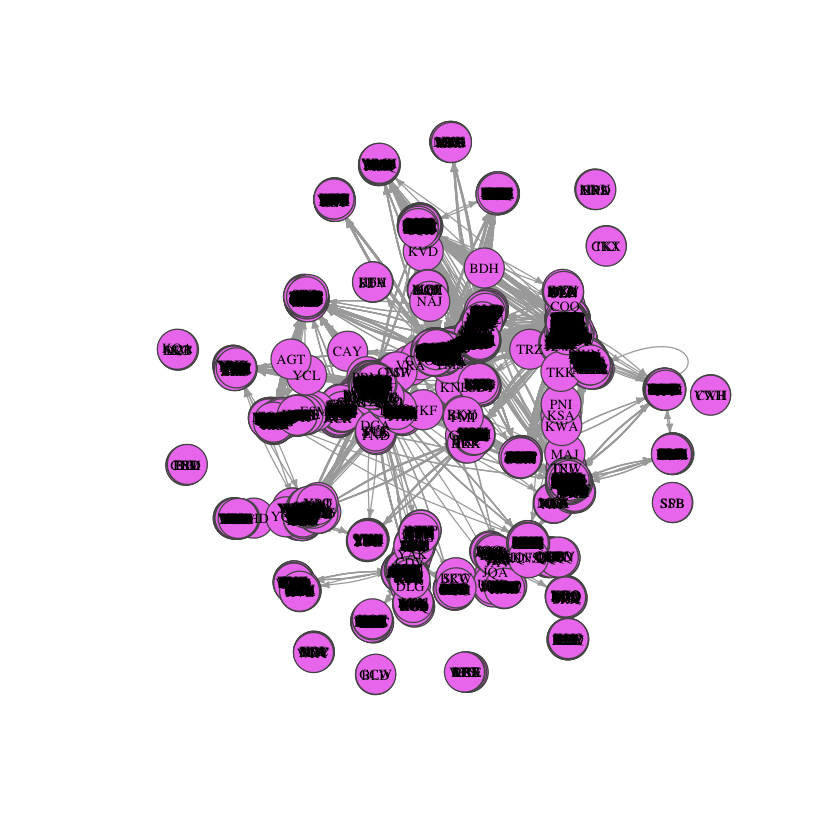

In [59]:
#Graficamos todo en una capa
plot(g17, 
     edge.arrow.size = .4, 
     edge.curved = .1,
     vertex.color = "violet", 
     vertex.frame.color = "#555555",
     vertex.label.color = "black",
     vertex.label.cex = .7)

In [60]:
#Distribución de grado de entrada
degree(g17, mode = "in") %>% table

.
  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
 10 793 523 322 218 171 113  85  70  62  52  34  34  31  41  19  25  23  17  19 
 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39 
 18  11  15  11  10   7  15  12   8   5   6  22   5   9   8   5  10   7   9   5 
 40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59 
  6   6   4  10   7   3   6   6   5   2   8   2   6   1   8   3   2   2   6   4 
 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  81 
  3   3   3   5   4   3   4   3   3   4   2   3   2   3   2   4   4   1   2   4 
 82  83  84  87  88  89  90  91  92  93  94  95  96  97  98 100 101 102 105 106 
  1   2   3   4   3   3   2   2   3   1   4   2   4   2   5   4   3   1   3   2 
107 108 109 111 112 113 114 115 116 118 122 123 124 125 130 131 132 133 134 136 
  1   2   1   1   3   1   1   1   3   1   1   1   3   2   1   1   1   1   2   1 
138 139 142 143 144 148 15

In [61]:
#Distribución de grado de salida
degree(g17, mode = "out") %>% table

.
  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
 23 785 521 322 227 169 106  83  75  52  55  35  33  34  35  25  23  18  21  18 
 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39 
 16  13  19   8  10  14   8  10   9  10   6  17   8  10   6   6   7   7  10   6 
 40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59 
  7   6   8   6   2   7   6   3   7   5   6   1   8   7   3   1   5   1   5   4 
 60  61  62  63  64  65  66  67  68  69  71  72  73  74  75  76  77  78  79  81 
  4   1   6   1   3   5   5   2   3   5   3   2   2   4   2   2   5   1   3   1 
 82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 
  3   2   4   1   2   3   1   1   3   3   2   4   4   1   3   1   3   1   2   4 
102 105 106 107 108 109 111 112 114 115 116 117 118 122 123 124 126 131 132 134 
  2   1   1   4   2   1   3   1   1   2   1   2   1   1   1   4   1   2   1   1 
135 136 137 139 141 142 14

In [62]:
#¿Cuántas aerolíneas diferentes tenemos?
rutas17f$Airline %>% unique %>% length

[1] 567

In [63]:
#Saco una tabla sólo de codeshares de la 2017
tabla_rutas17_codeshare <- tabla_rutas17 %>% 
  dplyr::filter(Codeshare == TRUE)

tabla_rutas17_codeshare %>% head

Airline,Airline_ID,From,From_ID,To,To_ID,Codeshare,Stops,Equipment
2P,897,GES,2402,MNL,2397,TRUE,0,320
2P,897,MNL,2397,GES,2402,TRUE,0,320
4M,3201,DFW,3670,EZE,3988,TRUE,0,777
4M,3201,EZE,3988,DFW,3670,TRUE,0,777
4M,3201,EZE,3988,JFK,3797,TRUE,0,777
4M,3201,JFK,3797,EZE,3988,TRUE,0,777


In [64]:
#Estructura. 14597 rutas con Codeshare
str(tabla_rutas17_codeshare)

'data.frame':	14597 obs. of  9 variables:
 $ Airline   : chr  "2P" "2P" "4M" "4M" ...
 $ Airline_ID: chr  "897" "897" "3201" "3201" ...
 $ From      : chr  "GES" "MNL" "DFW" "EZE" ...
 $ From_ID   : chr  "2402" "2397" "3670" "3988" ...
 $ To        : chr  "MNL" "GES" "EZE" "DFW" ...
 $ To_ID     : chr  "2397" "2402" "3988" "3670" ...
 $ Codeshare : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ Stops     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Equipment : chr  "320" "320" "777" "777" ...


In [65]:
#Busco la ruta DEN-LAX
tabla_rutas17 %>% dplyr::filter(From == "DEN" & To == "LAX")

Airline,Airline_ID,From,From_ID,To,To_ID,Codeshare,Stops,Equipment
AA,24,DEN,3751,LAX,3484,TRUE,0,CR7
AS,439,DEN,3751,LAX,3484,TRUE,0,CR7
F9,2468,DEN,3751,LAX,3484,FALSE,0,319 320
FL,1316,DEN,3751,LAX,3484,TRUE,0,73W 73C
UA,5209,DEN,3751,LAX,3484,FALSE,0,739 320 319 738 753 752
US,5265,DEN,3751,LAX,3484,FALSE,0,CR7
WN,4547,DEN,3751,LAX,3484,FALSE,0,733 73H 73C 73W


Obtenemos la matriz de adyacencia.

In [66]:
matriz_multiplex <- as_adjacency_matrix(g17)
matriz_multiplex
#Recordemos que los pesos corresponden a rutas iguales de diferentes aerolíneas, como se prueba abajo.

   [[ suppressing 32 column names ‘AER’, ‘ASF’, ‘CEK’ ... ]]
   [[ suppressing 32 column names ‘AER’, ‘ASF’, ‘CEK’ ... ]]
   [[ suppressing 32 column names ‘AER’, ‘ASF’, ‘CEK’ ... ]]


3189 x 3189 sparse Matrix of class "dgCMatrix"
                                                                          
AER . . . 4 . . . 1 1 . . . . . 2 . . . . . . . . . . . . . . . . . ......
ASF . . . 2 . . . 1 1 1 . . . . . . . . . . . . . . . . . . . . . . ......
CEK . . . 2 . . . 1 1 . . . . 2 . . . . . . . . . . . . . . . . . . ......
DME 3 2 2 . 3 2 3 4 5 3 1 2 3 3 3 1 1 1 1 2 . 1 . . . 1 . . . . . . ......
EGO . . . 3 . . 1 1 1 . . . . . . . . . . . . . . . . . . . . . . . ......
GYD . . . 2 . . . . 2 1 1 . . 2 2 . . . . . . . . . . . . . . . . . ......
KGD . . . 3 1 . . . 1 . . . . . . . . . . . . . . . . . . . . . . . ......
KZN 1 1 1 4 1 . . . 3 . . . . . 1 . . . . . . . . . . . . . . . . . ......
LED 1 1 1 5 1 2 1 3 . 1 1 . . 3 2 . 1 . . . . . . . . 1 . . . . . . ......
MRV . 1 . 3 . 1 . . 1 . . . . . 3 . . . . . . . . . . . . . . . . . ......
NBC . . . 1 . 1 . . 1 . . . . . 1 . . . . . . . . . . . . . . . . . ......
NJC . . . 1 . . . . . . . . . 3 2 . 2 . . . . . . . .

In [67]:
#Primero la convertimos a matrix
matriz_multiplex <- as.matrix(matriz_multiplex)
str(matriz_multiplex)

 num [1:3189, 1:3189] 0 0 0 3 0 0 0 1 1 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:3189] "AER" "ASF" "CEK" "DME" ...
  ..$ : chr [1:3189] "AER" "ASF" "CEK" "DME" ...


Pasamos la matriz de adyacencia a una de 0's y 1's, es decir, no pesada

In [68]:
# Convertimos matriz_multiplex a una matriz de adyacencia dirigida y no pesada.
matriz_multiplex_du <- ifelse(matriz_multiplex == 0,
                                yes = 0,
                                 no = 1) 

matriz_multiplex_du

,AER,ASF,CEK,DME,EGO,GYD,KGD,KZN,LED,MRV,⋯,BVS,MTE,DLZ,UII,ZBF,CMP,BSS,AEX,GCK,MGM
AER,0,0,0,1,0,0,0,1,1,0,⋯,0,0,0,0,0,0,0,0,0,0
ASF,0,0,0,1,0,0,0,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
CEK,0,0,0,1,0,0,0,1,1,0,⋯,0,0,0,0,0,0,0,0,0,0
DME,1,1,1,0,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
EGO,0,0,0,1,0,0,1,1,1,0,⋯,0,0,0,0,0,0,0,0,0,0
GYD,0,0,0,1,0,0,0,0,1,1,⋯,0,0,0,0,0,0,0,0,0,0
KGD,0,0,0,1,1,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
KZN,1,1,1,1,1,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
LED,1,1,1,1,1,1,1,1,0,1,⋯,0,0,0,0,0,0,0,0,0,0
MRV,0,1,0,1,0,1,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0


Ahora guardo esta matriz "matriz_multiplex_du" 

In [69]:
##write.csv(matriz_multiplex_du, "data/matriz_multiplex_du.csv")

Pruebas para ver por qué la matriz de adyacencia de la matriz_multi tiene pesos.

In [70]:
#pruebaOTP <- tabla_rutas2 %>%
#  dplyr::filter(From == "OTP")

In [71]:
#pruebaOTP %>% head

In [72]:
#str(pruebaOTP)

In [73]:
#pruebaOTP20 <- pruebaOTP %>%
#  dplyr::filter(To == "BCM")

In [74]:
#pruebaOTP20

In [75]:
#pruebaOTP21 <- pruebaOTP %>%
#  dplyr::filter(To == "CLJ")

In [76]:
#pruebaOTP21

De estas pruebas concluimos que los pesos de la matriz_multi corresponden a rutas entre los mismos aeropuertos pero de diferentes aerolíneas.

Así que, la matriz de adyacencia que usaremos es una en la que convirtamos los pesos a 1's.

In [77]:
##Primero la convertimos a matrix
#matriz_multi <- as.matrix(matriz_multi)

In [78]:
#str(matriz_multi)

In [79]:
#matriz_multi

In [80]:
## Convertimos matriz_multi a una matriz de adyacencia dirigida y no pesada.
#matriz_multi_uw <- ifelse(matriz_multi == 0,
#                            yes = 0,
#                             no = 1) 

In [81]:
#matriz_multi_uw

Ahora guardo esta matriz "matriz_multi_uw" 

In [82]:
#write.csv(matriz_multi_uw, "data/matriz_multi_uw.csv")

In [83]:
#write.matrix

### Medidas de centralidad de esta red monocapa de rutas.

In [84]:
#Grado
degree(g17) %>% head

AER ASF CEK DME EGO GYD 
 52  16  40 597  22 108

In [85]:
#Distribución de grado


In [86]:
#Estructura de degree(g)
str(degree(g17))

 Named num [1:3189] 52 16 40 597 22 108 28 56 348 44 ...
 - attr(*, "names")= chr [1:3189] "AER" "ASF" "CEK" "DME" ...


In [87]:
#Average Shortest Path Length
average.path.length(g17)

[1] 4.184484

In [88]:
#Betweenness
betweenness(g17) %>% head

AER          ASF          CEK          DME          EGO          GYD 
2.783243e+02 4.755776e+00 3.481884e+01 3.291271e+05 1.558492e+00 2.945702e+03

In [89]:
#Diámetro
diameter(g17)

[1] 15

In [90]:
#Radio
radius(g17)

[1] 1

In [91]:
#Excentricidad
eccentricity(g17) %>% head

AER ASF CEK DME EGO GYD 
  9   9   9   9  10   9

In [92]:
#Transitivity/Clustering Coefficient
transitivity(g17)

[1] 0.2501483

#### Para crear la red multicapa

In [93]:
str(rutas17f)

'data.frame':	53055 obs. of  6 variables:
 $ From     : chr  "AER" "ASF" "ASF" "CEK" ...
 $ To       : chr  "KZN" "KZN" "MRV" "KZN" ...
 $ Codeshare: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Stops    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Equipment: chr  "CR2" "CR2" "CR2" "CR2" ...
 $ Airline  : chr  "2B" "2B" "2B" "2B" ...


In [94]:
#Vemos cuántas aerolíneas distintas tenemos
length(unique(rutas17f$Airline))

[1] 567

In [95]:
#Tomo todas las aerolíneas posibles con unique
#Como las aerolíneas son de tipo Factor, lo convierto a caracteres 

mis_aerolineas <- unique(rutas17f$Airline)
mis_aerolineas %>% head
#mis_aerolineas <- as.character(unique(da.fr$Airline)) 

[1] "2B" "2G" "2I" "2J" "2K" "2L"

In [96]:
#La lista "hereda" los nombres
names(mis_aerolineas) <- mis_aerolineas
mis_aerolineas %>% head

2B   2G   2I   2J   2K   2L 
"2B" "2G" "2I" "2J" "2K" "2L"

In [97]:
#write.csv(mis_aerolineas, file = paste("data/aerolineas_matrices/","lista_aerolineas.csv"))

In [98]:
#Se aplica el filtrado para aerolíneas, que corresponderán a distintas capas 
#y le agrega el grafo g a cada capa

graph_capas <- lapply(mis_aerolineas, FUN = function(i){
  ruta_aerol <- dplyr::filter(.data = rutas17f, Airline == i)
  g <- igraph::graph_from_data_frame(d = ruta_aerol, 
                                     directed = TRUE)
}) 

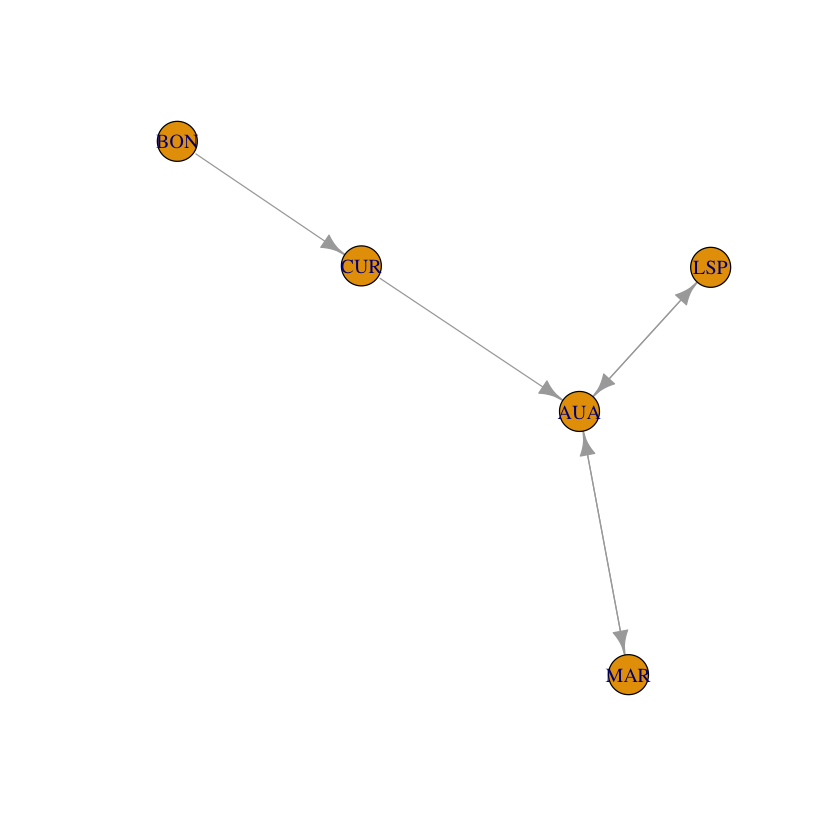

In [99]:
#Eg. Se grafica la red de la capa correspondiente a la aerolínea 2B
plot(graph_capas$`3P`)

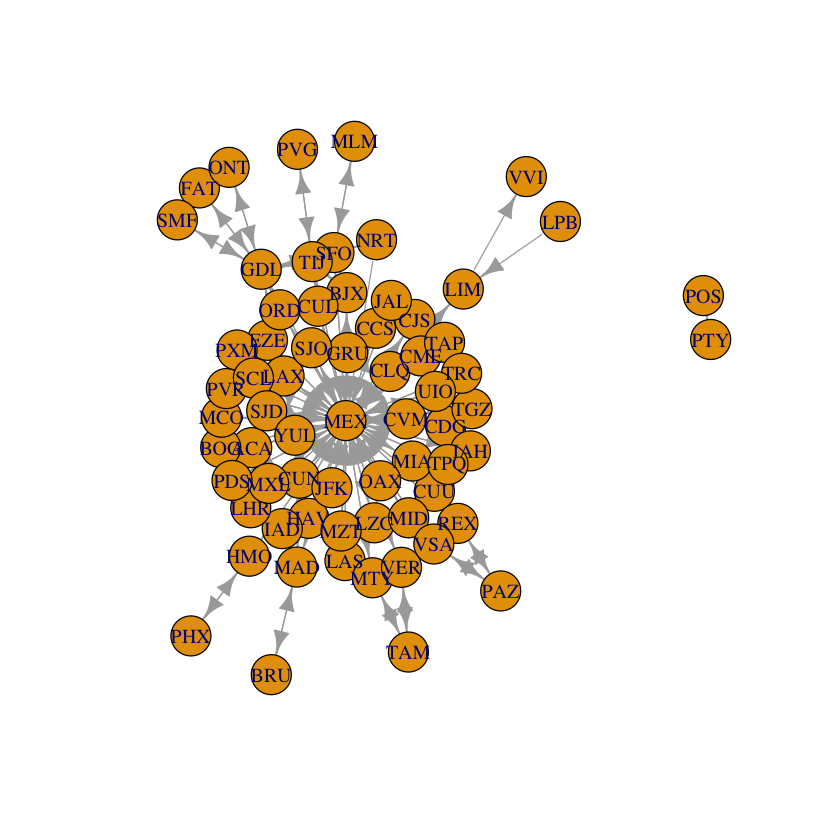

In [100]:
#Eg. Se grafica la red de la capa correspondiente a la aerolínea AM
plot(graph_capas$AM)

##### ¿Por qué aparece el aeropuerto POS en esta aerolínea desconectado?

In [101]:
#Busco la ruta MEX-POS
tabla_rutas2017 %>% dplyr::filter(From == "MEX" & To == "POS")

Airline,Airline_ID,From,From_ID,To,To_ID,Codeshare,Stops,Equipment


In [102]:
tabla_rutas2017 %>% dplyr::filter(Airline == "AM" & From == "POS")

Airline,Airline_ID,From,From_ID,To,To_ID,Codeshare,Stops,Equipment
AM,321,POS,2902,PTY,1871,,0,73G E90


In [103]:
tabla_rutas2017 %>% dplyr::filter(Airline == "AM" & To == "POS")

Airline,Airline_ID,From,From_ID,To,To_ID,Codeshare,Stops,Equipment
AM,321,PTY,1871,POS,2902,,0,73G E90


In [104]:
degree(graph_capas$AM)

ACA BJX BOG BRU CCS CDG CJS CLQ CME CUL CUN CUU CVM EZE FAT GDL GRU HAV HMO IAD 
  2   6   2   2   2   2   2   2   2   4  10   2   2   2   2  16   2   4   4   2 
IAH JAL JFK LAS LAX LHR LIM LPB LZC MAD MCO MEX MIA MID MLM MTY MXL MZT NRT OAX 
  2   2   4   4   7   2   4   1   2   6   2 105   2   4   2   6   2   2   2   2 
ONT ORD PAZ PDS PHX POS PTY PVG PVR PXM REX SCL SFO SJD SJO SMF TAM TAP TGZ TIJ 
  2   4   4   2   2   2   2   2   2   2   4   2   8   3   2   2   4   2   2  11 
TPQ TRC UIO VER VSA YUL VVI 
  2   2   2   6   8   2   1

In [105]:
degree(graph_capas$AM, mode = "in")

ACA BJX BOG BRU CCS CDG CJS CLQ CME CUL CUN CUU CVM EZE FAT GDL GRU HAV HMO IAD 
  1   3   1   1   1   1   1   1   1   2   5   1   1   1   1   8   1   2   2   1 
IAH JAL JFK LAS LAX LHR LIM LPB LZC MAD MCO MEX MIA MID MLM MTY MXL MZT NRT OAX 
  1   1   2   2   4   1   2   0   1   3   1  53   1   2   1   3   1   1   1   1 
ONT ORD PAZ PDS PHX POS PTY PVG PVR PXM REX SCL SFO SJD SJO SMF TAM TAP TGZ TIJ 
  1   2   2   1   1   1   1   1   1   1   2   1   4   1   1   1   2   1   1   5 
TPQ TRC UIO VER VSA YUL VVI 
  1   1   1   3   4   1   1

In [106]:
degree(graph_capas$AM, mode = "out")

ACA BJX BOG BRU CCS CDG CJS CLQ CME CUL CUN CUU CVM EZE FAT GDL GRU HAV HMO IAD 
  1   3   1   1   1   1   1   1   1   2   5   1   1   1   1   8   1   2   2   1 
IAH JAL JFK LAS LAX LHR LIM LPB LZC MAD MCO MEX MIA MID MLM MTY MXL MZT NRT OAX 
  1   1   2   2   3   1   2   1   1   3   1  52   1   2   1   3   1   1   1   1 
ONT ORD PAZ PDS PHX POS PTY PVG PVR PXM REX SCL SFO SJD SJO SMF TAM TAP TGZ TIJ 
  1   2   2   1   1   1   1   1   1   1   2   1   4   2   1   1   2   1   1   6 
TPQ TRC UIO VER VSA YUL VVI 
  1   1   1   3   4   1   0

De aquí vemos que POS y PTY en realidad están conectados el uno con el otro.

##### ¿Por qué aparece el aeropuerto PTY en esta aerolínea desconectado?

In [107]:
#Busco la ruta MEX-POS
tabla_rutas2017 %>% dplyr::filter(From == "MEX" & To == "PTY")

Airline,Airline_ID,From,From_ID,To,To_ID,Codeshare,Stops,Equipment
AM,321,MEX,1824,PTY,1871,Y,0,738 73G
CM,1889,MEX,1824,PTY,1871,,0,738 73G


No está conectado MEX y PTY porque al momento de filtrar, quitamos esa ruta pues es un codeshare, posiblemente con CM que es CM Airlines (Cielo Maya), compañía doméstica de Honduras.

## Exportamos los archivos de cada aerolínea

In [108]:
##Función que guarda el grafo de cada aerolínea en un archivo
#exportar_capa <- lapply(mis_aerolineas, FUN = function(i){
#    aerol <- dplyr::filter(.data = rutas17f, Airline == i)
#    g <- igraph::graph_from_data_frame(d = aerol,
#                                      directed = TRUE)
#    matriz_multiplex <- as_adjacency_matrix(g)
#    matriz_multiplex <- as.matrix(matriz_multiplex)
#    matriz_multiplex_du <- ifelse(matriz_multiplex == 0,
#                                yes = 0,
#                                 no = 1) 
#    write.csv(matriz_multiplex_du, file = paste("data/aerolineas_matrices/",i,"_matriz_du.csv"))
#})

In [109]:
#, sep = "\t"

## Creación de un diccionario global

In [110]:
#mis_aerolineas

In [111]:
#lista_aerolineas = read_csv("data/aerolineas_matrices/lista_aerolineas.csv")

In [112]:
#lista_aerolineas$Airline[1]

In [113]:
#codigo_aerolinea = lista_aerolineas$Airline[1]
#read_csv("data/diccionarios/",codigo_aerolinea,"_airport_names.csv", col_names = codigo_aerolinea)

In [114]:
##Eg. aerolínea 3P
#rutas17f %>% dplyr::filter(Airline == "3P")

In [115]:
##Sí sirven...
##Agrego al ciclo las centralidades de cada capa
#capas <- lapply(mis_aerolineas, FUN = function(i){
#  xf <- dplyr::filter(.data = da.fr, Airline == i)
#  g <- igraph::graph_from_data_frame(d = xf, 
#                                     directed = TRUE)
#  Resultados <- list(APL = average.path.length(g), 
#                     Diametro = diameter(g),
#                     Radio = radius(g),
#                     Clustering_Coefficient = transitivity(g),
#                     Red = g)
#  
#  return(Resultados)
#}) 

In [116]:
##Sí sirven...
##Generalizamos.
##Hacemos un ciclo que llame a la función capas y las grafique
#for(i in seq_along(capas)){
#  plot(capas[[i]][["Red"]],
#       main = names(capas[i]))
#}

In [117]:
##Eg. Llamamos la información de APL de la capa correspondiente a la aerolínea 2B
#capas$`2B`$APL

In [118]:
##Eg. Llamamos la información de APL de la capa correspondiente a la aerolínea AM
#capas$AM$APL

In [119]:
##Eg. Llamamos la información de APL de la capa correspondiente a la aerolínea AM
#capas$AM$Diametro

In [120]:
##Eg. Llamamos la información de APL de la capa correspondiente a la aerolínea AM
#capas$AM$Radio

In [121]:
##Eg. Llamamos la información de APL de la capa correspondiente a la aerolínea AM
#capas$AM$Clustering_Coefficient

In [122]:
##Eg. Para graficar la capa correspondiente a la aerolínea 2I.
##Graficamos la entrada Red de la aerolínea 2I
#plot(capas$`2I`$Red)

In [123]:
##Juntamos toda la información de las capas
#capas_totales <- capas[1:567
#                 ]

In [124]:
##Checamos los nombres de todas las aerolíneas
#names(capas_totales)

In [125]:
##Generalizamos.
##Hacemos un ciclo que llame a la función capas y las grafique
#for(i in seq_along(capas)){
#  plot(capas[[i]][["Red"]],
#       main = names(capas[i]))
#}

In [126]:
##Eg. Llamamos la entrada 1 del conjunto de capas totales y después llamamos la Red
#capas[[1]][["Red"]]

In [127]:
##Para graficarlo
#plot(capas_totales[[1]][["Red"]])

In [128]:
##Para averiguar cuántos nodos tenemos en la tabla_rutas2

## Se hace un diccionario global

In [129]:
####################### PRIMERA PARTE #########################

#Leo archivo 
dicc_global <- read.csv(file = "data/diccionario_aeropuertos_global.csv", header = FALSE, sep = ",")
#Se le cambia el nombre de V1 a global_airports
names(dicc_global) <- "global_airports"
#Se convierte a caracter
dicc_global$global_airports <- as.character(dicc_global$global_airports)
#Se hace lista de números
global_num <- 1:length(dicc_global$global_airports)
#Se concatenan
dictionary_global <- cbind(dicc_global, global_num)
dictionary_global %>% head

global_airports,global_num
AER,1
ASF,2
CEK,3
DME,4
EGO,5
GYD,6


In [130]:
#Leo lista aerolineas

lista_aerolineas <- read.csv(file = "data/aerolineas_matrices/lista_aerolineas.csv", header = TRUE, sep = ",")
lista_aerolineas <- as.character(lista_aerolineas$Airline)
lista_aerolineas %>% head

[1] "Star_Alliance" "Sky_Team"      "Oneworld"      "2B"           
[5] "2G"            "2I"

In [131]:
##Una aerolínea: 2B
#
#    
#    aerol <- paste(lista_aerolineas[1], "airport_names.csv", sep = "_") #creo nombre de archivo de aerolínea
#    
#    aero <- paste("data/diccionarios/", aerol, sep ="") #nombre de path
#    
#    aeropuertos_aerolinea <- read.csv(file = aero, header = FALSE, sep = ",") #se lee el archivo de nombres V1 DF/Fact
#    
#    aeropuertos_aerolinea$V1 <- as.character(aeropuertos_aerolinea$V1) #se convierte a caracter columna V1
#    
#    #aerol_num = paste(lista_aerolineas[1], "num", sep = "_")
#
#    aerol_num <- 1:nrow(aeropuertos_aerolinea) #se crea secuencia
#    
#    aeropuertos_aerolinea <- cbind(aeropuertos_aerolinea, aerol_num) #Se concatenan
#    
#    dictionary_global <- left_join(dictionary_global, aeropuertos_aerolinea, by = c("global_airports" = "V1"), keep = TRUE)
#
#    airp_seq <- paste(lista_aerolineas[1], "num", sep = "_") #se crea el nombre de la columna nueva
#    
#    names(dictionary_global)[ncol(dictionary_global)] <- airp_seq #se asigna el nombre
#
#

In [132]:
#dictionary_global %>% head

In [133]:
############################ CICLO FOR PARA CONCATENAR LA INFORMACIÓN DE TODAS LAS AEROLÍNEAS

resultado <- 0

dictionary_global <- for(i in seq_along(lista_aerolineas)){# FUN = function(i){     
    
    aerol <- paste(lista_aerolineas[i], "airport_names.csv", sep = "_") #creo nombre de archivo de aerolínea
    
    aero <- paste("data/diccionarios/", aerol, sep ="") #nombre de path, sep no existe
    
    aeropuertos_aerolinea <- read.csv(file = aero, header = FALSE, sep = ",") #se lee el archivo de nombres
    
    aeropuertos_aerolinea$V1 <- as.character(aeropuertos_aerolinea$V1) #se convierte a caracter columna
    
    aerol_num <- 1:nrow(aeropuertos_aerolinea) #se crea secuencia 1,2,...,nrow
    
    aeropuertos_aerolinea <- cbind(aeropuertos_aerolinea, aerol_num) #Se concatenan en columna la lista de aerop y num secuencia
    
    dictionary_global <- left_join(dictionary_global, aeropuertos_aerolinea, by = c("global_airports" = "V1"), keep = TRUE)

    airp_seq <- paste(lista_aerolineas[i], "num", sep = "_") #se crea el nombre de la columna nueva
    
    names(dictionary_global)[ncol(dictionary_global)] <- airp_seq #se asigna el nombre
    
    resultado <- dictionary_global
    
                     }

#write.csv(resultado, file = paste("data/diccionarios/dictionary_final.csv"))
resultado

global_airports,global_num,Star_Alliance_num,Sky_Team_num,Oneworld_num,2B_num,2G_num,2I_num,2J_num,2K_num,⋯,Z8_num,Z9_num,ZB_num,ZD_num,ZE_num,ZH_num,ZI_num,ZK_num,ZL_num,ZM_num
AER,1,779,759,617,1,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ASF,2,783,761,619,2,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CEK,3,NA,733,624,3,2,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
DME,4,15,316,261,4,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1
EGO,5,NA,NA,NA,5,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
GYD,6,544,772,319,6,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
KGD,7,NA,777,636,7,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
KZN,8,817,784,641,8,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
LED,9,44,134,335,9,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MRV,10,NA,788,643,10,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [144]:
lista_aerolineas %>% head

[1] "Star_Alliance" "Sky_Team"      "Oneworld"      "2B"           
[5] "2G"            "2I"

In [152]:
getwd()

[1] "/Users/Yuriko/Documents/UNAM/Tesis_Lic"

In [167]:
nueva_lista_aerolineas = read.csv(file = "data/aerolineas_matrices/nueva_lista_aerolineas.csv", header = TRUE, sep = ",") 

In [168]:
nueva_lista_aerolineas %>% head

Nodes,Airlines
3072,global
934,Star_Alliance
900,Sky_Team
698,oneworld
259,AA
242,TK


In [171]:
str(nueva_lista_aerolineas)

'data.frame':	525 obs. of  2 variables:
 $ Nodes   : int  3072 934 900 698 259 242 230 192 188 184 ...
 $ Airlines: Factor w/ 525 levels "2B","2G","2I",..: 524 417 416 525 83 428 143 303 134 447 ...


In [169]:
nueva_listita_aerolineas <- nueva_lista_aerolineas %>% dplyr::select(Airlines)
nueva_listita_aerolineas %>% head

Airlines
global
Star_Alliance
Sky_Team
oneworld
AA
TK


In [170]:
nueva_listita_aerolineas

Airlines
global
Star_Alliance
Sky_Team
oneworld
AA
TK
DL
MU
CZ
UA


In [162]:
str(nueva_listita_aerolineas)

'data.frame':	525 obs. of  1 variable:
 $ Airlines: Factor w/ 525 levels "2B","2G","2I",..: 524 417 416 525 83 428 143 303 134 447 ...


In [165]:
nueva_listita_aerolineas <- as.character(nueva_listita_aerolineas)
str(nueva_listita_aerolineas)

 chr "c(524, 417, 416, 525, 83, 428, 143, 303, 134, 447, 179, 104, 87, 273, 124, 410, 444, 372, 158, 98, 257, 259, 40"| __truncated__


In [166]:
nueva_listita_aerolineas

[1] "c(524, 417, 416, 525, 83, 428, 143, 303, 134, 447, 179, 104, 87, 273, 124, 410, 444, 372, 158, 98, 257, 259, 404, 30, 210, 85, 84, 474, 333, 148, 164, 185, 132, 195, 89, 411, 393, 484, 101, 20, 167, 307, 432, 94, 479, 341, 302, 294, 211, 97, 426, 217, 485, 78, 284, 177, 239, 170, 128, 95, 520, 434, 405, 184, 93, 157, 91, 88, 189, 188, 183, 407, 351, 238, 129, 293, 445, 141, 107, 397, 90, 382, 35, 438, 309, 272, 456, 346, 263, 223, 207, 118, 270, 162, 468, 214, 117, 67, 352, 192, 76, 324, 278, 235, \n482, 400, 367, 261, 499, 254, 489, 280, 395, 295, 80, 60, 28, 409, 245, 99, 451, 384, 260, 92, 435, 377, 266, 244, 190, 186, 69, 461, 436, 403, 256, 113, 285, 172, 433, 355, 41, 522, 495, 471, 349, 373, 458, 242, 220, 73, 501, 463, 292, 222, 165, 55, 50, 490, 472, 317, 306, 201, 329, 498, 312, 59, 422, 344, 175, 145, 476, 315, 225, 146, 486, 464, 454, 361, 319, 213, 196, 171, 68, 227, 15, 318, 127, 140, 131, 521, 291, 277, 268, 163, 109, 12, 473, 368, 322, 297, 251, 224, 219, 187, 120, 415, 193, \n115, 86, 74, 439, 340, 310, 274, 138, 121, 119, 102, 63, 9, 504, 487, 481, 414, 375, 241, 105, 70, 54, 38, 16, 14, 450, 412, 399, 398, 376, 342, 249, 176, 112, 111, 66, 8, 1, 488, 429, 391, 308, 232, 199, 182, 517, 509, 418, 390, 298, 275, 221, 144, 133, 122, 103, 71, 65, 62, 48, 32, 514, 502, 475, 437, 430, 420, 330, 300, 265, 258, 246, 202, 178, 106, 100, 31, 519, 493, 478, 470, 443, 413, 366, 338, 269, 75, 52, 508, 507, 483, 467, 455, 369, 358, 327, 301, 250, 248, 237, 203, 503, 496, 480, 453, \n449, 396, 354, 305, 267, 181, 174, 173, 142, 79, 19, 18, 7, 2, 513, 442, 441, 440, 408, 387, 364, 347, 314, 313, 288, 226, 215, 209, 194, 191, 139, 135, 82, 45, 24, 448, 427, 419, 406, 402, 386, 371, 356, 348, 337, 334, 320, 296, 287, 264, 255, 230, 218, 156, 147, 34, 6, 4, 505, 477, 446, 431, 401, 381, 370, 357, 339, 336, 311, 304, 289, 252, 236, 228, 168, 161, 116, 114, 3, 515, 511, 494, 466, 462, 362, 325, 281, 276, 160, 126, 77, 61, 56, 42, 27, 516, 506, 425, 424, 383, 365, 316, 299, 240, 233, \n212, 198, 151, 130, 64, 46, 44, 39, 37, 29, 5, 469, 394, 380, 379, 378, 363, 331, 321, 253, 247, 243, 229, 216, 150, 125, 58, 57, 53, 40, 17, 13, 11, 10, 518, 465, 459, 452, 421, 392, 389, 385, 360, 353, 350, 345, 328, 326, 323, 290, 286, 279, 206, 180, 169, 159, 155, 153, 136, 123, 110, 96, 51, 23, 523, 500, 497, 491, 457, 374, 332, 283, 282, 271, 231, 154, 152, 149, 108, 81, 72, 26, 512, 510, 492, 460, 423, 388, 359, 343, 335, 262, 234, 208, 205, 204, 200, 197, 166, 137, 49, 47, 43, 36, 33, 25, \n22, 21)"

In [157]:
#read.csv(file = "data/diccionarios/global_airport_names.csv", header = FALSE, sep = ",") 

In [161]:
############################ CICLO FOR PARA CONCATENAR LA INFORMACIÓN DE TODAS LAS AEROLÍNEAS

resultado <- 0

dictionary_global <- for(i in seq_along(nueva_listita_aerolineas)){# FUN = function(i){     
    
    aerol <- paste(nueva_listita_aerolineas[i], "airport_names.csv", sep = "_") #creo nombre de archivo de aerolínea
    
    aero <- paste("data/diccionarios/", aerol, sep ="") #nombre de path, sep no existe
    
    aeropuertos_aerolinea <- read.csv(file = aero, header = FALSE, sep = ",") #se lee el archivo de nombres
    
    aeropuertos_aerolinea$V1 <- as.character(aeropuertos_aerolinea$V1) #se convierte a caracter columna
    
    aerol_num <- 1:nrow(aeropuertos_aerolinea) #se crea secuencia 1,2,...,nrow
    
    aeropuertos_aerolinea <- cbind(aeropuertos_aerolinea, aerol_num) #Se concatenan en columna la lista de aerop y num secuencia
    
    dictionary_global <- left_join(dictionary_global, aeropuertos_aerolinea, by = c("global_airports" = "V1"), keep = TRUE)

    airp_seq <- paste(lista_aerolineas[i], "num", sep = "_") #se crea el nombre de la columna nueva
    
    names(dictionary_global)[ncol(dictionary_global)] <- airp_seq #se asigna el nombre
    
    resultado <- dictionary_global
    
                     }

#write.csv(resultado, file = paste("data/diccionarios/dictionary_final.csv"))
resultado

Warning message in file(file, "rt"):
“no fue posible abrir el archivo 'data/diccionarios/c(524, 417, 416, 525, 83, 428, 143, 303, 134, 447, 179, 104, 87, 273, 124, 410, 444, 372, 158, 98, 257, 259, 404, 30, 210, 85, 84, 474, 333, 148, 164, 185, 132, 195, 89, 411, 393, 484, 101, 20, 167, 307, 432, 94, 479, 341, 302, 294, 211, 97, 426, 217, 485, 78, 284, 177, 239, 170, 128, 95, 520, 434, 405, 184, 93, 157, 91, 88, 189, 188, 183, 407, 351, 238, 129, 293, 445, 141, 107, 397, 90, 382, 35, 438, 309, 272, 456, 346, 263, 223, 207, 118, 270, 162, 468, 214, 117, 67, 352, 192, 76, 324, 278, 235, 
482, 400, 367, 261, 499, 254, 489, 280, 395, 295, 80, 60, 28, 409, 245, 99, 451, 384, 260, 92, 435, 377, 266, 244, 190, 186, 69, 461, 436, 403, 256, 113, 285, 172, 433, 355, 41, 522, 495, 471, 349, 373, 458, 242, 220, 73, 501, 463, 292, 222, 165, 55, 50, 490, 472, 317, 306, 201, 329, 498, 312, 59, 422, 344, 175, 145, 476, 315, 225, 146, 486, 464, 454, 361, 319, 213, 196, 171, 68, 227, 15, 318, 127, 140, 

ERROR: Error in file(file, "rt"): no se puede abrir la conexión


In [135]:
#
#    aerol <- paste(lista_aerolineas[2], "airport_names.csv", sep = "_") #creo nombre de archivo de aerolínea
#    
#    aero <- paste("data/diccionarios/", aerol, sep ="") #nombre de path
#    
#    aeropuertos_aerolinea <- read.csv(file = aero, header = FALSE, sep = ",") #se lee el archivo de nombres
#    
#    #aeropuertos_aerolinea <- as.character(aeropuertos_aerolinea$V1) #se convierte a caracter columna
#    
#    aerol_num <- 1:length(aeropuertos_aerolinea) #se crea secuencia
#    
#    aeropuertos_aerolinea <- cbind(aeropuertos_aerolinea, aerol_num) #Se concatenan
#    
#    dictionary_global <- left_join(dictionary_global, aeropuertos_aerolinea, by = c("global_airports" = "V1"), keep = TRUE)
#
#    airp_seq <- paste(lista_aerolineas[2], "num", sep = "_") #se crea el nombre de la columna nueva
#    
#    names(dictionary_global)[ncol(dictionary_global)] <- airp_seq #se asigna el nombre
#

In [136]:
#dictionary_global

In [137]:
#nombres_global$airp_code <- as.character(nombres_global$airp_code)

In [138]:
#length(nombres_global$airp_code) #cantidad de aeropuertos en el mundo

In [139]:
#num_aerop <- 1:length(nombres_global$airp_code)

In [140]:
#dicc_global <- cbind(num_aerop, nombres_global)

In [141]:
#nombres_2B <- read.csv(file = "data/diccionarios/2B_airport_names.csv", header = FALSE, sep = ",")

In [142]:
#nombres_2B %>% head

In [143]:
#nombres_2B <- read.csv(file = "data/diccionarios/2B_airport_names.csv", header = FALSE, sep = ",")
##Se le cambia el nombre
#names(nombres_2B) <- "2B_nodes"
##Se convierte a caracter
##dicc_global$airp_code <- as.character(dicc_global$airp_code)
##Se hace lista de números
#num_aerop <- 1:length(dicc_global$airp_code)
##Se concatenan
##dicc_global <- cbind(num_aerop, dicc_global)